Recently I had to generate a uniformly distributed random coordinate inside a circle. The first simple technique I thought of is a two steps:

1. Generate a random coordinate x,y inside a square subscribing a circle.
2. Return (x,y) if it's inside a circle, otherwise repeat.

In code it looks like this.

In [60]:
import random

def uniform_circle(R):
    while True:
        x = random.uniform(-R, R)
        y = random.uniform(-R, R)
        if x ** 2 + y ** 2 <= R ** 2:
            return x, y

The following is just some housekeeping. I define a function to sample and to display results. Feel free to skip it.

In [54]:
from matplotlib import pyplot as plt

def sample_and_plot(sampler, title, size=500, R=1):
    plt.axes().set_aspect('equal', 'datalim')
    for i in range(size):
        x, y = sampler(R)
        plt.scatter(x, y, s=3, color='b')
    circle = plt.Circle((0, 0), R, color='k', fill=False)
    plt.gcf().gca().add_artist(circle)
    plt.axis('off')
    plt.title(title)

Now we're ready to sample.

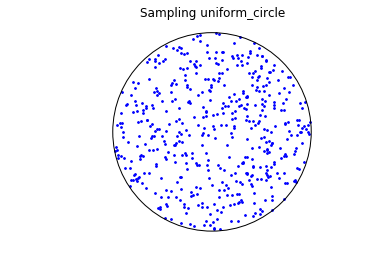

In [55]:
sample_and_plot(uniform_circle, "Sampling uniform_circle")

This method of generating a random coordinate is correct. But it requires some trial and error. The probability of generating a coordinate inside a circle at each iteration can be found by dividing the circle area by the area of a subscribing square.

$$ \frac{\pi R^2}{(2R)^2} = \frac{\pi}{4} \approx 0.785 $$ 

## Random Polar Coordinate

This filtering technique works well but I didn't like the while loop. There must be a better way to generate a random coordinate inside a circle. And that's when I thought of polar coordinates. Any point inside a circle with radius $R$ can be defined by an angle $\theta$ and a distance from center $r < R$.

1. Generate $r$ from a uniform distribution $\mathcal{U}(0, R)$.
2. Generate $\theta$ from a uniform distribution $\mathcal{U}(0, 2\pi) $.
3. Transform $(r, \theta)$ to Cartesian coordinate $ x = r\cos(\theta)$ and $y = r\sin(\theta)$.

The code is straight forward.

In [61]:
import random
from math import pi, sin, cos

def random_polar(R):
    r = random.uniform(0, R)
    theta = random.uniform(0, 2 * pi)
    return r * cos(theta), r * sin(theta)

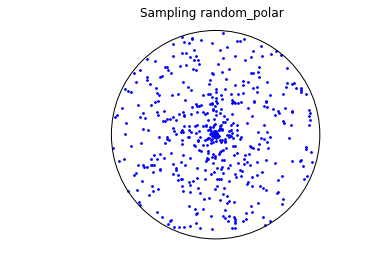

In [63]:
sample_and_plot(random_polar, "Sampling random_polar")

We can see how this method creates random coordinates. But the resulting sample is more concentrated in the center!

## Uniform Polar Adjustment

Sampling $r$ and $\theta$ from a uniform distribution doesn't look like a uniform distribution. The reason for this is simple. The area covered by a polar $(\Delta r, \Delta\theta)$ is proportional to $r^2$. As we go further from the center the space expands. Each consecutif $\Delta r$ covers more and more area. In order to produce a uniform distribution we must compensate for that expansion.

$$ r  \sim R\sqrt{\mathcal{U}(0, 1)} $$

Some sources use an equivalent formulation $\sqrt{\mathcal{U}(0, R^2)}$

This is only a sketch of an explanation. More details can be found in this [Stackoverflow question]( https://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly).




In [62]:
import random
from math import pi, sin, cos, sqrt

def uniform_polar(R):
    r = R * sqrt(random.random())
    theta = random.uniform(0, 2 * pi)
    return r * cos(theta), r * sin(theta)

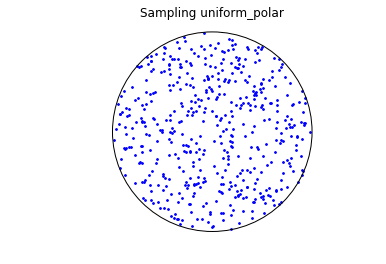

In [64]:
sample_and_plot(uniform_polar, "Sampling uniform_polar")

And after the adjustment we get a uniform distribution once again. 